# MELODI Presto Analysis Example

In [40]:
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

## Configure parameters

In [10]:
API_URL = "https://melodi-presto.mrcieu.ac.uk/api/"

requests.get(f"{API_URL}/status").json()

True

### Set up some functions

In [18]:
#overlap
def overlap(q1,q2):
    endpoint = "/overlap/"
    url = f"{API_URL}{endpoint}"
    params = {
        "x": q1,
        "y": q2,
    }
    response = requests.post(url, data=json.dumps(params))
    res = response.json()
    if 'data' in res:
        overlap_df = (    
            pd.json_normalize(res['data'])
        )
    else:
        overlap_df=pd.DataFrame()
    #overlap_df
    return overlap_df

### COVID-19 risk factors



In [16]:
q1=['risk factors']
q2=['covid-19','coronavirus']

overlap_df = overlap(q1,q2)

In [17]:
overlap_counts = overlap_df.groupby(['set_y','object_type_x'])['object_name_x'].value_counts()
overlap_counts

set_y        object_type_x  object_name_x                       
coronavirus  dsyn           Infection                               484
                            Diabetes                                220
                            Hypertensive disease                     99
                            Pneumonia                                50
                            Acute myocardial infarction              18
                            Respiratory Distress Syndrome, Adult      9
                            Inflammatory Bowel Diseases               6
                            Syndrome                                  5
                            Septicemia                                3
                            Autoimmune Diseases                       2
             gngm           Cyclosporine                              1
                            Phosphotransferases                       1
covid-19     dsyn           Hypertensive disease                    297

### COVID-19 risk factors
Factors associated with hospitalization and critical illness among 4,103 patients with COVID-19 disease in New York City:

https://www.medrxiv.org/content/10.1101/2020.04.08.20057794v1

In [44]:
q1=['C-reactive protein','ferritin','d-dimer']
q2=['covid-19','coronavirus']

overlap_df = overlap(q1,q2)

,triple_x,subject_name_x,subject_type_x,subject_id_x,predicate_x,object_name_x,object_type_x,object_id_x,localCount_x,localTotal_x,...,object_type_y,object_id_y,localCount_y,localTotal_y,globalCount_y,globalTotal_y,odds_y,pval_y,pmids_y,set_y
0,C-reactive protein:PREDISPOSES:Cardiovascular ...,C-reactive protein,aapp,C0006560,PREDISPOSES,Cardiovascular Diseases,dsyn,C0007222,282,62335,...,dsyn,C5203670,2,740,2,6862606,9298.921409,6.960000e-08,32281055 32304798,covid-19
1,C-reactive protein:ASSOCIATED_WITH:Cardiovascu...,C-reactive protein,aapp,C0006560,ASSOCIATED_WITH,Cardiovascular Diseases,dsyn,C0007222,169,62335,...,dsyn,C5203670,2,740,2,6862606,9298.921409,6.960000e-08,32281055 32304798,covid-19
2,Metabolic syndrome:PREDISPOSES:Cardiovascular ...,Metabolic syndrome,dsyn,C0948265,PREDISPOSES,Cardiovascular Diseases,dsyn,C0007222,73,62335,...,dsyn,C5203670,2,740,2,6862606,9298.921409,6.960000e-08,32281055 32304798,covid-19
3,Obesity:PREDISPOSES:Cardiovascular Diseases,Obesity,dsyn,C0028754,PREDISPOSES,Cardiovascular Diseases,dsyn,C0007222,46,62335,...,dsyn,C5203670,2,740,2,6862606,9298.921409,6.960000e-08,32281055 32304798,covid-19
4,Hypertensive disease:PREDISPOSES:Cardiovascula...,Hypertensive disease,dsyn,C0020538,PREDISPOSES,Cardiovascular Diseases,dsyn,C0007222,35,62335,...,dsyn,C5203670,2,740,2,6862606,9298.921409,6.960000e-08,32281055 32304798,covid-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,Ferritin:INTERACTS_WITH:Monoclonal Antibodies,Ferritin,aapp,C0015879,INTERACTS_WITH,Monoclonal Antibodies,aapp,C0003250,3,16878,...,aapp,C0065827,2,4335,2,6862606,1583.799677,2.388600e-06,30877355,coronavirus
873,Septicemia:CAUSES:Blood Coagulation Disorders,Septicemia,dsyn,C0036690,CAUSES,Blood Coagulation Disorders,dsyn,C0005779,8,5356,...,dsyn,C5203670,3,740,3,6862606,9311.537313,0.000000e+00,32302442 32302462,covid-19
874,Pulmonary Embolism:NEG_COEXISTS_WITH:Blood Coa...,Pulmonary Embolism,dsyn,C0034065,NEG_COEXISTS_WITH,Blood Coagulation Disorders,dsyn,C0005779,2,5356,...,dsyn,C5203670,3,740,3,6862606,9311.537313,0.000000e+00,32302442 32302462,covid-19
875,Chronic Obstructive Airway Disease:COEXISTS_WI...,Chronic Obstructive Airway Disease,dsyn,C0024117,COEXISTS_WITH,Respiratory Failure,dsyn,C1145670,7,5356,...,dsyn,C5203670,3,740,3,6862606,9311.537313,0.000000e+00,32299776 32277836 32320677,covid-19


In [51]:
overlap_counts = overlap_df.groupby(['set_x','set_y','object_type_x'])['object_name_x'].value_counts()
overlap_counts.to_csv('test.csv')

### Psoriasis

https://www.cell.com/ajhg/fulltext/S0002-9297(12)00157-7

In [18]:
q1=['AP1S3','IL36RN','CARD14']
q2=['Psoriasis']

overlap_df = overlap(q1,q2)

In [19]:
overlap_counts = overlap_df.groupby(['set_x','object_type_x'])['object_name_x'].value_counts()
overlap_counts

set_x   object_type_x  object_name_x                
ap1s3   gngm           CARD14                             5
card14  aapp           NF-kappa B                         3
        dsyn           Psoriasis                        861
                       Autoimmune Diseases               10
                       skin disorder                      8
        gngm           NF-kappa B                        21
                       CARD14                             5
il36rn  aapp           Interleukin Receptor               1
        dsyn           Arthritis, Psoriatic              33
                       Pustulosis of Palms and Soles      3
        gngm           CARD14                             5
                       Interleukin Receptor               1
Name: object_name_x, dtype: int64

### Drug repurposing

https://www.medrxiv.org/content/10.1101/2020.05.07.20093286v1

In [20]:
q1=['DHODH', 'ITGB5', 'JAK2']
q2=['Leflunomide','Cilengitide','Baricitinib']

overlap_df = overlap(q1,q2)

In [21]:
overlap_counts = overlap_df.groupby(['set_x','set_y','object_type_x'])['object_name_x'].value_counts()
overlap_counts

set_x  set_y        object_type_x  object_name_x                     
dhodh  leflunomide  aapp           Phosphotransferases                    1
                    dsyn           Rheumatoid Arthritis                   9
                    gngm           Dihydroorotate dehydrogenase          50
                                   Dihydroorotate dehydrogenase|DHODH     1
                    orch           leflunomide                           92
                                   Pyrimidine                            12
jak2   baricitinib  aapp           Janus kinase                           4
                                   Janus kinase 1|JAK1                    4
                                   cytokine                               3
                    gngm           Janus kinase                          11
                                   Janus kinase 1|JAK1                    4
                                   cytokine                               1
                  

### Other drug repurposing

https://www.nature.com/articles/nrd.2018.168/tables/1lo

In [22]:
q1=['(Ketoconazole) AND (("1900"[Date - Create] : "2000"[Date - Create]))']
q2=['(Cushing syndrome) AND (("1900"[Date - Create] : "2000"[Date - Create]))']

overlap_df = overlap(q1,q2)

In [23]:
overlap_counts = overlap_df.groupby(['object_type_x'])['object_name_x'].value_counts()
overlap_counts

object_type_x  object_name_x                  
aapp           Corticotropin|POMC                  62
               Glucocorticoid Receptor              1
dsyn           Cushing Syndrome                    36
               Hypertensive disease                 6
               Adrenal Gland Hyperfunction          3
               Infection                            3
               Mycoses                              3
               Adrenal gland hypofunction           1
               Histoplasmosis                       1
gngm           Corticotropin|POMC                  31
               Corticotropin-Releasing Hormone     20
horm           Hydrocortisone                     138
               Adrenal Cortex Hormones             14
               Testosterone                        14
               Corticotropin                       13
               Androgens                            6
               Estradiol                            2
               Steroid hormone     

##### Changes over time

Loop through 20 years and look at change

In [70]:
#
year_range=range(1980,2021)
#year_range=range(1990,1995)

master_df=pd.DataFrame()

qterm1='Ketoconazole'
qterm2='Cushing syndrome'

#qterm1='Dapoxetine'
#qterm2='Premature ejaculation'
#this example highlights an issue with SemMedDB, it identifies the gene SLC4A1 but is mistaken, perhaps for the text DI. 
#interestingly manual run of SemRep does not find this relationship


for y in year_range:
    q1=['('+qterm1+') AND (("1900"[Date - Create] : "'+str(y).zfill(2)+'"[Date - Create]))']
    q2=['('+qterm2+') AND (("1900"[Date - Create] : "'+str(y).zfill(2)+'"[Date - Create]))']
    print(y)
    overlap_df = overlap(q1,q2)
    if overlap_df.empty:
        continue;
    overlap_counts = overlap_df.groupby(['object_type_x'])['object_name_x'].value_counts()
    overlap_counts_df = overlap_counts.rename_axis(['type','name']).reset_index(name='counts').sort_values(by='counts',ascending=False)
    #add year
    overlap_counts_df['year']=y
    #add relative counts
    overlap_counts_df['rel_counts']=(overlap_counts_df['counts']/sum(overlap_counts_df['counts']))*100
    print(overlap_counts_df.shape)
    print(overlap_counts_df)
    master_df = master_df.append(overlap_counts_df)
    
print(master_df)

1980
1981
1982
1983
(1, 5)
   type            name  counts  year  rel_counts
0  horm  Hydrocortisone      10  1983       100.0
1984
(2, 5)
   type            name  counts  year  rel_counts
1  horm  Hydrocortisone      11  1984   91.666667
0  dsyn         Mycoses       1  1984    8.333333
1985
(3, 5)
   type                     name  counts  year  rel_counts
1  horm           Hydrocortisone      12  1985        60.0
2  horm  Adrenal Cortex Hormones       6  1985        30.0
0  dsyn                  Mycoses       2  1985        10.0
1986
(8, 5)
   type                     name  counts  year  rel_counts
2  horm           Hydrocortisone      26  1986   41.269841
0  aapp       Corticotropin|POMC      20  1986   31.746032
3  horm  Adrenal Cortex Hormones       6  1986    9.523810
7  orch             Ketoconazole       4  1986    6.349206
4  horm             Testosterone       3  1986    4.761905
1  dsyn                  Mycoses       2  1986    3.174603
5  horm                Androgens      

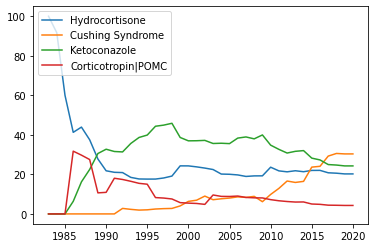

In [81]:
#master_df = master_df.pivot(index='name', columns='year', values='rel_counts')
#x = np.linspace(0, 6, 100)
#y_1 = 5*x
#y_2 = np.power(x, 2)
#y_3 = np.exp(x/1.5)
#plt.plot(x, y_1)
#plt.plot(x, y_2)
#plt.plot(x, y_3)
#plt.show()

#https://www.kaggle.com/andyxie/matplotlib-plot-multiple-lines

def map_term_to_year(term_data,years):
    yearDic={}
    for y in years:
        yearDic[y]=0
    for i,row in term_data.iterrows():
        #print(i,row['year'])
        yearDic[row['year']]=row['rel_counts']
    return list(yearDic.values())

term_list=["Hydrocortisone","Cushing Syndrome","Ketoconazole","Corticotropin|POMC"]

x = list(master_df['year'].unique())
y_1_data=master_df[master_df['name']==term_list[0]][['rel_counts','year']]
y_2_data=master_df[master_df['name']==term_list[1]][['rel_counts','year']]
y_3_data=master_df[master_df['name']==term_list[2]][['rel_counts','year']]
y_4_data=master_df[master_df['name']==term_list[3]][['rel_counts','year']]
y_1 = map_term_to_year(y_1_data,x)
y_2 = map_term_to_year(y_2_data,x)
y_3 = map_term_to_year(y_3_data,x)
y_4 = map_term_to_year(y_4_data,x)

#print(y_1)
plt.plot(x,y_1,label=term_list[0])
plt.plot(x, y_2,label=term_list[1])
plt.plot(x, y_3,label=term_list[2])
plt.plot(x, y_4,label=term_list[3])
plt.legend(loc="upper left")


#master_df.plot()

In [24]:
overlap_df

,triple_x,subject_name_x,subject_type_x,subject_id_x,predicate_x,object_name_x,object_type_x,object_id_x,localCount_x,localTotal_x,...,object_type_y,object_id_y,localCount_y,localTotal_y,globalCount_y,globalTotal_y,odds_y,pval_y,pmids_y,set_y
0,sildenafil:TREATS:Erectile dysfunction,sildenafil,orch,C0529793,TREATS,Erectile dysfunction,dsyn,C0242350,5,226,...,dsyn,C0028754,2,226,14,6862606,4376.653061,1.295000e-07,18624963 20574431,"(premature_ejaculation)_and_((""1900""[date_-_cr..."
1,vardenafil:TREATS:Erectile dysfunction,vardenafil,orch,C0971579,TREATS,Erectile dysfunction,dsyn,C0242350,3,226,...,dsyn,C0028754,2,226,14,6862606,4376.653061,1.295000e-07,18624963 20574431,"(premature_ejaculation)_and_((""1900""[date_-_cr..."
2,Diabetes:PREDISPOSES:Erectile dysfunction,Diabetes,dsyn,C0011847,PREDISPOSES,Erectile dysfunction,dsyn,C0242350,2,226,...,dsyn,C0028754,2,226,14,6862606,4376.653061,1.295000e-07,18624963 20574431,"(premature_ejaculation)_and_((""1900""[date_-_cr..."
3,Overactive Bladder:PREDISPOSES:Erectile dysfun...,Overactive Bladder,dsyn,C0878773,PREDISPOSES,Erectile dysfunction,dsyn,C0242350,2,226,...,dsyn,C0028754,2,226,14,6862606,4376.653061,1.295000e-07,18624963 20574431,"(premature_ejaculation)_and_((""1900""[date_-_cr..."
4,Prolactin:STIMULATES:SLC4A1,Prolactin,aapp,C0033371,STIMULATES,SLC4A1,gngm,6521,2,226,...,horm,C0023607,2,226,2,6862606,30636.625000,6.500000e-09,26399566,"(premature_ejaculation)_and_((""1900""[date_-_cr..."
5,Prolactin:STIMULATES:SLC4A1,Prolactin,aapp,C0033371,STIMULATES,SLC4A1,gngm,6521,2,226,...,horm,C0039601,2,226,2,6862606,30636.625000,6.500000e-09,26399566,"(premature_ejaculation)_and_((""1900""[date_-_cr..."
6,Prolactin:STIMULATES:SLC4A1,Prolactin,aapp,C0033371,STIMULATES,SLC4A1,gngm,6521,2,226,...,horm,C0733758,2,226,2,6862606,30636.625000,6.500000e-09,26399566,"(premature_ejaculation)_and_((""1900""[date_-_cr..."
7,Epilepsy:COEXISTS_WITH:Sexual Dysfunction,Epilepsy,dsyn,C0014544,COEXISTS_WITH,Sexual Dysfunction,dsyn,C0549622,2,226,...,dsyn,C0030567,5,226,24,6862606,6469.251508,4.395951e-18,14742099 20205139 25466402,"(premature_ejaculation)_and_((""1900""[date_-_cr..."
8,Epilepsy:COEXISTS_WITH:Sexual Dysfunction,Epilepsy,dsyn,C0014544,COEXISTS_WITH,Sexual Dysfunction,dsyn,C0549622,2,226,...,dsyn,C0033581,3,226,4,6862606,23080.500000,0.000000e+00,26242047,"(premature_ejaculation)_and_((""1900""[date_-_cr..."
9,Epilepsy:COEXISTS_WITH:Sexual Dysfunction,Epilepsy,dsyn,C0014544,COEXISTS_WITH,Sexual Dysfunction,dsyn,C0549622,2,226,...,dsyn,C0856619,2,226,2,6862606,30636.625000,6.500000e-09,25971858,"(premature_ejaculation)_and_((""1900""[date_-_cr..."


In [31]:
#check a sentence

triple='Prolactin:STIMULATES:SLC4A1'
pmid='26399566'

endpoint = "/sentence/"
url = f"{API_URL}{endpoint}"
params = {
    "pmid": pmid,
}
response = requests.post(url, data=json.dumps(params))
res = response.json()
pub_df = (
    pd.json_normalize(res['data'])
)
pub_df[['SUBJECT_NAME','PREDICATE','OBJECT_NAME','SENTENCE']]

,SUBJECT_NAME,PREDICATE,OBJECT_NAME,SENTENCE
0,Prolactin,STIMULATES,SLC4A1,Levels of prolactin were significantly increas...
1,Fetal Resorption,COEXISTS_WITH,Infertility,"In addition, the treatment markedly increased ..."
2,SLC4A1,INHIBITS,Luteinizing Hormone,A significant decline in the number of spermat...
3,SLC4A1,INHIBITS,Testosterone,A significant decline in the number of spermat...
4,SLC4A1,INHIBITS,Follicle Stimulating Hormone,A significant decline in the number of spermat...
5,Prolactin,STIMULATES,SLC4A1,Levels of prolactin were significantly increas...
6,SLC4A1,INHIBITS,Luteinizing Hormone,A significant decline in the number of spermat...
7,SLC4A1,INHIBITS,Follicle Stimulating Hormone,A significant decline in the number of spermat...
8,SLC4A1,INHIBITS,Testosterone,A significant decline in the number of spermat...


[0.         0.06060606 0.12121212 0.18181818 0.24242424 0.3030303
 0.36363636 0.42424242 0.48484848 0.54545455 0.60606061 0.66666667
 0.72727273 0.78787879 0.84848485 0.90909091 0.96969697 1.03030303
 1.09090909 1.15151515 1.21212121 1.27272727 1.33333333 1.39393939
 1.45454545 1.51515152 1.57575758 1.63636364 1.6969697  1.75757576
 1.81818182 1.87878788 1.93939394 2.         2.06060606 2.12121212
 2.18181818 2.24242424 2.3030303  2.36363636 2.42424242 2.48484848
 2.54545455 2.60606061 2.66666667 2.72727273 2.78787879 2.84848485
 2.90909091 2.96969697 3.03030303 3.09090909 3.15151515 3.21212121
 3.27272727 3.33333333 3.39393939 3.45454545 3.51515152 3.57575758
 3.63636364 3.6969697  3.75757576 3.81818182 3.87878788 3.93939394
 4.         4.06060606 4.12121212 4.18181818 4.24242424 4.3030303
 4.36363636 4.42424242 4.48484848 4.54545455 4.60606061 4.66666667
 4.72727273 4.78787879 4.84848485 4.90909091 4.96969697 5.03030303
 5.09090909 5.15151515 5.21212121 5.27272727 5.33333333 5.393939

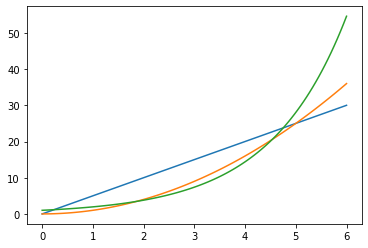

In [41]:


x = np.linspace(0, 6, 100)
#print(x)
y_1 = 5*x
y_2 = np.power(x, 2)
y_3 = np.exp(x/1.5)
plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)
plt.show()
